In [1]:
from utils import gen_dataset
from utils import treine
from utils import Eval_metric
from utils import predict
import torch
from modelo import Linear
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import sys as s
import warnings
warnings.filterwarnings('ignore')


In [2]:
Input, Output, Input_test, Output_test = gen_dataset(5, True)


Nosso dataset possui 45 gráficos que representam o sinal de uma célula até completar a mitose
Cada gráfico gera dois exemplos de treino, então o nosso dataset tem tamanho 90. 
Separando o dataset por um dado de entrada (Input) e um valor correto de saída (Output) :
np.shape(Input) =  (50, 30) : os 50 primeiros gráficos de intervalo  30.
np.shape(Output) =  (50,) : o vetor de 50 valores corretos, que segundo a organização do dataset, é composto de [0,1,0,1,...]
np.shape(Input_Test) (40, 30) : os últimos 40 gráficos de intervalo  30.
np.shape(Output_Test) (40,) : o vetor de 40 valores corretos é composto de [0,1,0,1,...]
Separando o dataset em grupos de 10, ou seja, batch_size = 10. O dataset fica pronto para realizar o treino
Input_Train torch.Size([5, 10, 30])
Train_Labels torch.Size([5, 10, 1])
Input_Test torch.Size([4, 10, 30])
test_Labels torch.Size([4, 10, 1])
Por exemplo, inp[0][0] representa os primeiros 30 pontos e inp[0][1] os últimos 30 pontos do mesmo gráfico


In [5]:
def eval_model(proportion, epochs_i, epochs_f):
    y1 = []
    y2 = []
    epochs = []
    for epoch in range(epochs_i, epochs_f, 10):
        _, _, inp, out = gen_dataset(proportion, False)
        model = Linear()
        #predict(model, inp, out, 0, 1)
        PATH_load = 'state_0_model.pt'
        model.load_state_dict(torch.load(PATH_load))
        erro, acerto = Eval_metric(model, 'test')
        #print('antes de treinar o modelo acertou {} do conjunto de teste'.format(acerto))
        #print('antes de treinar o modelo errou {} do conjunto de teste'.format(erro))
        treine(model, epoch)
        #predict(model, inp, out, 0, 1)
        epochs.append(epoch)
        erro, acerto = Eval_metric(model, 'test')
        print('após {} epocas de treino, '.format(epoch),
              'acertou {} do conjunto de teste'.format(acerto))
        #print('após {} epocas de treino, '.format(epoch),
        #      'errou {} do conjunto de teste'.format(erro))
        #size = np.shape(Input_test)[0]*np.shape(Input_test)[1]
        # print(size)
        y1.append(erro)  # /size)
        y2.append(acerto)  # /size)
    return y1, y2, epochs, proportion


In [6]:
y1, y2, epochs, proportion = eval_model(2, 10, 80)


após 10 epocas de treino,  acertou 0.6857142857142857 do conjunto de teste
após 20 epocas de treino,  acertou 0.6714285714285714 do conjunto de teste
após 30 epocas de treino,  acertou 0.6857142857142857 do conjunto de teste
após 40 epocas de treino,  acertou 0.6714285714285714 do conjunto de teste
após 50 epocas de treino,  acertou 0.7 do conjunto de teste
após 60 epocas de treino,  acertou 0.7285714285714285 do conjunto de teste
após 70 epocas de treino,  acertou 0.7142857142857143 do conjunto de teste


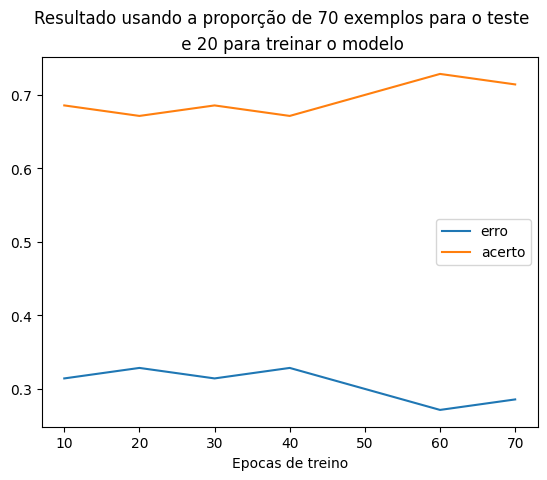

In [10]:
plt.plot(epochs, y1, label='erro')
plt.legend()
plt.plot(epochs, y2, label='acerto')
plt.legend()
plt.xlabel('Epocas de treino')
plt.suptitle('Resultado usando a proporção de {} exemplos para o teste'.format((9-proportion)*10))
plt.title(' e {} para treinar o modelo'.format((proportion)*10))

plt.show()  


In [11]:
for i in range(2,10):
    y1, y2, epochs, proportion = eval_model(i, 10, 140)

2
3
4
5
6
7
8
9
